In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [84]:
BA_reviews = pd.read_csv("British_Airways_reviews.csv").loc[:,"rating":"user_reviews"].reset_index().rename(columns={'index':'id'})
BA_reviews.head()

,id,rating,timestamp,aircraft_flown,travel_type,cabin,route,date_of_flight,seat_comfort,cabin_service,food_and_beverages,ground_service,wifi_service,value_for_money,will_recommend,trip_verified,user_reviews
0,0,5.0,11th February 2024,A380,Solo Leisure,First Class,London to San Francisco,November 2023,1.0,4.0,1.0,4.0,2.0,1,no,Trip Verified,I am a British Airways Gold Guest List member...
1,1,1.0,8th February 2024,NaN,Couple Leisure,Economy Class,London Heathrow to Casablanca,February 2024,NaN,NaN,NaN,1.0,NaN,1,no,Not Verified,Another case of reviewing British Airways fl...
2,2,8.0,6th February 2024,NaN,Family Leisure,Premium Economy,London Heathrow to Glasgow,January 2024,4.0,3.0,NaN,5.0,NaN,4,yes,Trip Verified,"On the memorable day of January 9th, my famil..."
3,3,1.0,5th February 2024,NaN,Couple Leisure,Economy Class,London Heathrow to Berlin,October 2023,1.0,1.0,NaN,1.0,NaN,1,no,Not Verified,I did not actually get to fly with BA as they...
4,4,6.0,2nd February 2024,A380-800,Couple Leisure,Business Class,London to Miami,February 2024,3.0,4.0,4.0,2.0,NaN,3,no,Trip Verified,We had possibly the worse check-in experience...


## What kind of data we got from scraping the website? 

<function matplotlib.pyplot.show(close=None, block=None)>

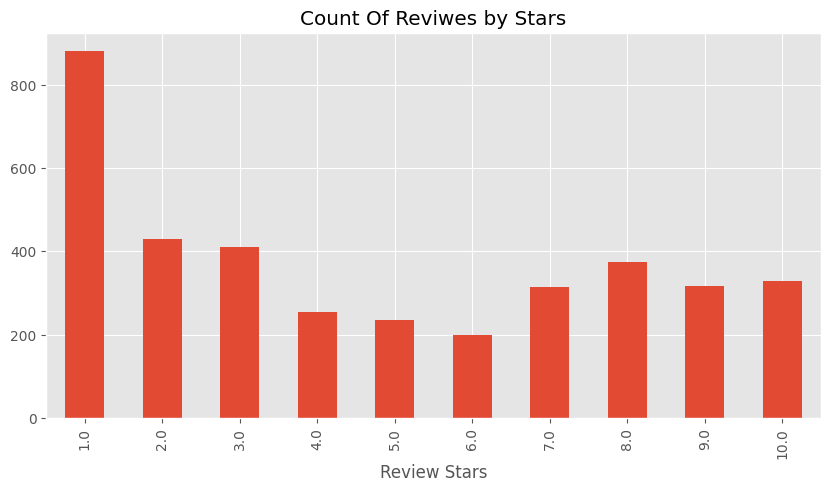

In [72]:
ax = BA_reviews["rating"].value_counts().sort_index().plot(
    kind = 'bar',
    title = 'Count Of Reviwes by Stars',
    figsize=(10,5)
)
ax.set_xlabel("Review Stars")
plt.show()

# How usable is it and cleaning it up
Now during early years of data collection, the format of data was a bit different, in that no information about the data being verified was collected which led to misclassification of user_review data into being into trip_verified column by the scraper. But since the data can be useful, we will also consider those reviews in our analysis and hence will fill up the the user_reviews with the values in trip_verified column and put NaN at those place for the trip_verified.

In [92]:
idx = BA_reviews["user_reviews"].isna()
BA_reviews.loc[idx,["user_reviews","trip_verified"]]

,user_reviews,trip_verified
1320,NaN,Two regular an uneventful flights. Curiously e...
1961,NaN,Flew London Gatwick to Tampa with British Airw...
1965,NaN,Frankfurt to Cape Town via London Heathrow. Th...
1974,NaN,Bangkok to Manchester via London. I used to fl...
1975,NaN,The return flight from St Lucia started well. ...
...,...,...
2241,NaN,British Airways standards have dropped dramati...
2243,NaN,Refusing to pay £73 pp to reserve seats in Bus...
2244,NaN,Having flown on an Emirates and Thai A380 I ha...
2245,NaN,Toronto to Entebbe via London with British Air...


In [93]:
BA_reviews.loc[idx,"user_reviews"] = BA_reviews.loc[idx,"trip_verified"]
BA_reviews.loc[idx,"trip_verified"] = np.NaN
BA_reviews.loc[idx,["user_reviews","trip_verified"]]

,user_reviews,trip_verified
1320,Two regular an uneventful flights. Curiously e...,NaN
1961,Flew London Gatwick to Tampa with British Airw...,NaN
1965,Frankfurt to Cape Town via London Heathrow. Th...,NaN
1974,Bangkok to Manchester via London. I used to fl...,NaN
1975,The return flight from St Lucia started well. ...,NaN
...,...,...
2241,British Airways standards have dropped dramati...,NaN
2243,Refusing to pay £73 pp to reserve seats in Bus...,NaN
2244,Having flown on an Emirates and Thai A380 I ha...,NaN
2245,Toronto to Entebbe via London with British Air...,NaN


# Sentiment Anlysis
Now that we have a more complete dataset of all user_reviews we can carry out sentimental analysis for the same


# VADER Sentiment Scores

In [80]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [76]:
example = BA_reviews.loc[100,"user_reviews"]
print(example)
sia.polarity_scores(example)

 Worst BA experience. I was supposed to fly out to Italy on 7 September 2023. I arrived at OR Tambo International airport ready to check my bags in (I already checked-in online the previous evening so I had my boarding pass ready). At the counter I was told that I had been off-loaded from the flight as my connecting flight has been cancelled. No information was sent regarding this beforehand. The team at the check-in counter tried to get me on another flight that evening, but there were no flights available. They did manage to get me another flight the following evening with Lufthansa to Italy via Frankfurt. However, I did miss the first part of my trip having arrived a day and a half later than I was supposed to. Upon moving the flights I did ask the BA staff whether my flights back are still valid and that everything is in order, which they assured me is correct. I have to fly back to South Africa on 18 September and upon checking my booking information I noticed on my BA account tha

{'neg': 0.052, 'neu': 0.909, 'pos': 0.039, 'compound': -0.3506}

In [94]:
BA_reviews["user_reviews"].isnull().sum()

0

In [104]:
res = {}
for i,row in BA_reviews.iterrows():
    r_id = row['id']
    review = row['user_reviews']
    scores = sia.polarity_scores(review)
    res[r_id] = scores

In [110]:
vaders_scores = pd.DataFrame(res).T.reset_index().rename(columns={"index":"id"})
vaders_scores

,id,neg,neu,pos,compound
0,0,0.081,0.789,0.130,0.9142
1,1,0.012,0.928,0.060,0.7942
2,2,0.028,0.820,0.152,0.9890
3,3,0.122,0.825,0.053,-0.3919
4,4,0.074,0.824,0.102,0.5741
...,...,...,...,...,...
3744,3744,0.067,0.877,0.056,-0.2003
3745,3745,0.000,0.712,0.288,0.8720
3746,3746,0.056,0.875,0.069,0.4516
3747,3747,0.000,0.711,0.289,0.9148


In [116]:
df = vaders_scores.merge(BA_reviews,on="id",how="left").loc[:,"compound":"will_recommend"].reset_index().rename(columns={"index":"id"})
df.head()

,id,compound,rating,timestamp,aircraft_flown,travel_type,cabin,route,date_of_flight,seat_comfort,cabin_service,food_and_beverages,ground_service,wifi_service,value_for_money,will_recommend
0,0,0.9142,5.0,11th February 2024,A380,Solo Leisure,First Class,London to San Francisco,November 2023,1.0,4.0,1.0,4.0,2.0,1,no
1,1,0.7942,1.0,8th February 2024,NaN,Couple Leisure,Economy Class,London Heathrow to Casablanca,February 2024,NaN,NaN,NaN,1.0,NaN,1,no
2,2,0.9890,8.0,6th February 2024,NaN,Family Leisure,Premium Economy,London Heathrow to Glasgow,January 2024,4.0,3.0,NaN,5.0,NaN,4,yes
3,3,-0.3919,1.0,5th February 2024,NaN,Couple Leisure,Economy Class,London Heathrow to Berlin,October 2023,1.0,1.0,NaN,1.0,NaN,1,no
4,4,0.5741,6.0,2nd February 2024,A380-800,Couple Leisure,Business Class,London to Miami,February 2024,3.0,4.0,4.0,2.0,NaN,3,no


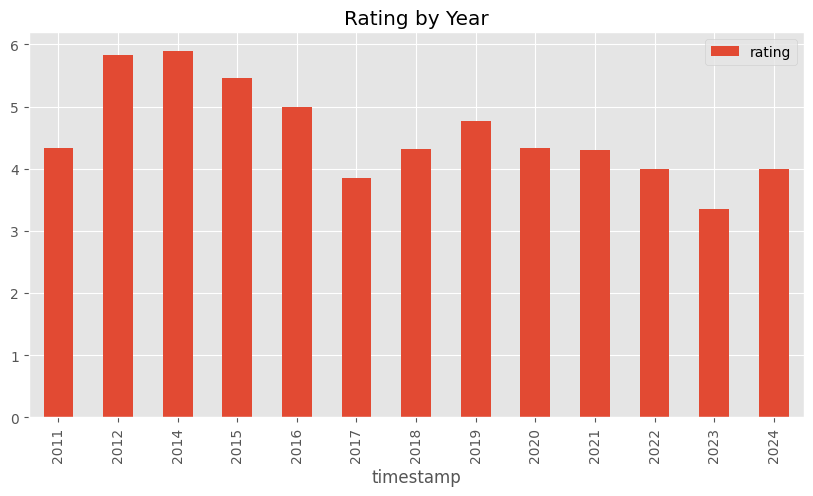

In [144]:
df["timestamp"] = pd.to_datetime(df["timestamp"],format='mixed')
df.loc[:,["timestamp","rating"]].groupby(df.timestamp.dt.year).mean().plot(
    kind = 'bar',
    title = 'Rating by Year',
    figsize=(10,5),
    y = "rating"
)
ax.set_xlabel("Review Stars")
plt.show()

In [150]:
column_names = ["rating","timestamp","aircraft_flown","travel_type","cabin","seat_comfort","cabin_service","food_and_beverages","ground_service","wifi_service","value_for_money"]

for column in column_names:
    print(column,df[f"{column}"].isnull().sum()/df.shape[0]*100)


rating 0.13336889837289945
timestamp 0.0
aircraft_flown 48.03947719391838
travel_type 20.565484129101094
cabin 0.05334755934915977
seat_comfort 3.147506001600427
cabin_service 3.4675913576953854
food_and_beverages 10.562816751133635
ground_service 22.566017604694586
wifi_service 83.22219258468925
value_for_money 0.0


Therefore columns wifi_service, aircraft_flown,are mostly useless because of such high numbers of missing values for atleast 50% reviews

In [152]:
df = df.drop(["wifi_service","aircraft_flown"],axis=1)
df.head()

,id,compound,rating,timestamp,travel_type,cabin,route,date_of_flight,seat_comfort,cabin_service,food_and_beverages,ground_service,value_for_money,will_recommend
0,0,0.9142,5.0,2024-02-11,Solo Leisure,First Class,London to San Francisco,November 2023,1.0,4.0,1.0,4.0,1,no
1,1,0.7942,1.0,2024-02-08,Couple Leisure,Economy Class,London Heathrow to Casablanca,February 2024,NaN,NaN,NaN,1.0,1,no
2,2,0.9890,8.0,2024-02-06,Family Leisure,Premium Economy,London Heathrow to Glasgow,January 2024,4.0,3.0,NaN,5.0,4,yes
3,3,-0.3919,1.0,2024-02-05,Couple Leisure,Economy Class,London Heathrow to Berlin,October 2023,1.0,1.0,NaN,1.0,1,no
4,4,0.5741,6.0,2024-02-02,Couple Leisure,Business Class,London to Miami,February 2024,3.0,4.0,4.0,2.0,3,no


In [153]:
df.dtypes

id                             int64
compound                     float64
rating                       float64
timestamp             datetime64[ns]
travel_type                   object
cabin                         object
route                         object
date_of_flight                object
seat_comfort                 float64
cabin_service                float64
food_and_beverages           float64
ground_service               float64
value_for_money                int64
will_recommend                object
dtype: object

In [154]:
df.loc[:,["travel_type","cabin","will_recommend"]] = df.loc[:,["travel_type","cabin","will_recommend"]].astype('category')

In [155]:
df.dtypes

id                             int64
compound                     float64
rating                       float64
timestamp             datetime64[ns]
travel_type                   object
cabin                         object
route                         object
date_of_flight                object
seat_comfort                 float64
cabin_service                float64
food_and_beverages           float64
ground_service               float64
value_for_money                int64
will_recommend                object
dtype: object

## Linear Regression

Try to predict rating using compound scores, seat_comfort,cabin_service,food_and_beverage,ground_service

In [156]:
from sklearn.linear_model import LinearRegression

In [164]:
model = LinearRegression()
X = df.loc[:,["compound","seat_comfort","cabin_service","food_and_beverages","ground_service","value_for_money"]].fillna(0)
Y = df["rating"].fillna(0)
model.fit(X,Y)
Y_pred = model.predict(X)

In [179]:
model.score(X,Y)

0.842403965532807

Therefore a simple linear regression model paired with VADER sentiment analysis is able to explain about 85% of variability in the data and can predict rating reliabily. Also looking at the model coefficients, we can see that value_for_money plays the biggest role in determining the rating. Other than that, compound score for the review plays the second biggest role in that.